# Applied Statistics Tasks Notebook

Author: Sean Humphreys

Contact: sean@cruaghgreen.com

This Jupyter Notebook contains the solutions to the tasks for the 2024 Applied Statistics module on the ATU Mayo/Galway Higher Diploma in Science in Computing in Data Analytics

## Contents

## Software Libraries

The following software libraries are used in this notebook:

+ [Math](https://docs.python.org/3/library/math.html) (https://docs.python.org/3/library/math.html - last accessed 16. Oct 2024) The math library provides access to the mathematical functions defined by the C standard.

+ [Itertools](https://docs.python.org/3/library/itertools.html#module-itertools) (https://docs.python.org/3/library/itertools.html#module-itertools - last accessed 16. Oct 2024). The itertools library is native within python. It provides functions creating iterators for efficient looping.

+ [Random](https://docs.python.org/3/library/random.html) (https://docs.python.org/3/library/random.html - last accessed 16. Oct 2024) The random library implements pseudo-random number generators for various distributions.

+ [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 16. Oct 2024)  - is an open-source software library for creating static, animated, and interactive visualisations in Python.

+ [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 16. Oct 2024) - is an open-source software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

+ [SciPy](https://scipy.org/) (https://scipy.org/ - last accessed 29 Oct. 2024) provides algorithms for scientific computing in Python. SciPy is a portmanteau of Scientific Python. It is a scientific computation library that uses Numpy underneath.

In [1]:
# import the required software libraries in the order they are used in the notebook
import math
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Data Visualisation

The "fivethirtyeight" plot stye sheet is applied which tries to replicate the styles from [https://abcnews.go.com/538](https://abcnews.go.com/538) (last accessed 16. Oct 2024).

In [2]:
# plot styling 
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html [Accessed 16 Oct. 2023]
plt.style.use('fivethirtyeight')

# set the default size of plots
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib [Accessed 21 Oct. 2024]
plt.rcParams["figure.figsize"] = (10,5)

---

## Task 1: Permutations and Combinations

### Problem Statement

Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups. 

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. 

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

### Introduction

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">

The [*Lady Tasting Tea Experiment*](https://en.wikipedia.org/wiki/Lady_tasting_tea) (https://en.wikipedia.org/wiki/Lady_tasting_tea)  is an experiment devised by [Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) (https://en.wikipedia.org/wiki/Ronald_Fisher) to test the null hypothesis.


Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether the milk or the tea was poured into her cup first. In the experiment the lady is presented with eight cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely.

![tea cups](images/task_1/tea_cups.png "tea cups")

<i>Imaged sourced https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/</i>


### Null Hypothesis
*A null hypothesis is a type of statistical hypothesis that proposes that no statistical significance exists in a set of given observations* (Investopedia, n.d.). The null hypothesis is denoted by H<sub>0</sub>. In the *Lady Tasting Tea Experiment* the Null Hypothesis is that the lady has no special ability to tell is the milk was pouted into the cup of tea before the tea.

The statement that is being tested against the null hypothesis is the alternative hypothesis. The alternative hypothesis is denoted by H<sub>a</sub>. 

H<sub>0</sub> and H<sub>a</sub> are mutually exclusive (Majaski, 2024). Only one can be true. However, one of the two hypotheses will always be true. 

The statistical likelihood of the lady correctly selecting the four cups of tea with milk poured first was so low that it would be surprising for this to happen. In this case Fisher was willing to reject null hypothesis.

### Assumptions

1. H<sub>0</sub> is that the lady has no special powers in figuring it out, she is randomly guessing which cups had the milk poured in first.

2. H<sub>a</sub> is that the lady can tell the difference between cups of tea that have the milk poured in first and cups of tea that had the tea poured in first.

3. There is no replacement once a cup has been selected. That is to say that the first cup is selected from a total of twelve cups, the second from a pool of eleven cups, the third from a pool of ten cups, etc.

4. The order in which the cups of tea with milk poured are selected first doesn't matter, the lady just has to correctly identify the six cups.

#### Calculate, using Python, the probability that they select the correct six cups.

Firstly, using Python calculate the number of permutations for twelve cups.

In [3]:
# assign the total number of cups to a variable
total_no_cups = 12

# define a function to return the factorial of an int
# based on code found here: https://www.programiz.com/python-programming/examples/factorial

def fact(num):
    factorial=1
    for i in range(1,num + 1):
        factorial = factorial*i
    return factorial

In [4]:
perms_total = fact(total_no_cups)
print(f'The total number of permutations for {total_no_cups} cups is {perms_total}.')

The total number of permutations for 12 cups is 479001600.


The order in which the cups with milk in first are selected doesn't matter, the lady has to select the six cups with milk in first. To calculate the number of possible combinations that the six cups with milk in first can be selected can be expressed as:

$6 \times 5 \times 4 \times 3 \times 2 \times 1 = 6! = 720$

The total number of cups selected = $r$

The total number of combinations possible is $r!$

Calculating $r!$ with Python:

In [5]:
# assign the number of cups selected to a variable
no_of_cups_selected = 6

combs_total = fact(no_of_cups_selected)
print(f'The total number of combination for {no_of_cups_selected} cups is {combs_total}.')

The total number of combination for 6 cups is 720.


Dividing the total number permutations by the total number of combinations would be incorrect as it does not reduce it by how many ways the six cups could be in order. Adjusting this caclulation to take this into account is expressed as

$\binom {n}{r} = {\frac {n!}{r!(n-r)!}}$

This is also known as n choose r (Mathsisfun.com, 2017). In this specific example it is 12 choose 6.

Using Python to calculate the chance of selecting the six cups with milk in first:

In [6]:
# n!/r!(n-r)!
ans = perms_total//(combs_total*(fact(total_no_cups-no_of_cups_selected)))
print(f'The chance of selecting the six milk in first cups out of the' 
      f' twelve cups is a 1 in {ans} chance.\nThe probability is {1/ans}')

The chance of selecting the six milk in first cups out of the twelve cups is a 1 in 924 chance.
The probability is 0.0010822510822510823


This can be validated using the in built ```math comb()``` (https://docs.python.org/3/library/math.html#math.comb (https://docs.python.org/3/library/math.html#math.comb) method in Python.

This function "*returns the number of ways picking k unordered outcomes from n possibilities, without repetition, also known as combinations*" (www.w3schools.com, n.d.).

In [7]:
ans_2 = math.comb(12,6)

if ans == ans_2:
    print(f'Your manually calculated solution of {ans} is correct')
else:
    print('Your manually calculated solution is incorrect.')

Your manually calculated solution of 924 is correct


**Answer** - the probability that they select the correct six cups is 0.001 (rounded).

#### Calculate the probability, assuming they have no special powers, that the person makes at most one error.

To *make at most one error* the lady can either:

1. choose six cups correctly from twelve 

or

2. five cups correctly from the six cups that were chosen.

In scenario 1, as previously demonstrated by using the ``math.comb(12,6)`` function, there is a 1 in 924 chance of selecting the six cups with milk in first correctly. There is only one way to correctly select six cups.

In scenario 2 the lady still chooses six cups. Of those six cups five are correct. Mathematically the number of ways to do this is expressed as $\binom {6}{5}$ (6 choose 5).

Calculating $\binom {6}{5}$ with python:

In [8]:
math.comb(6,5)

6

Independently of choosing five correct cups from six the lady must choose one incorrect cup from 6: 

In [9]:
math.comb(6,1)

6

$\therefore$ the number of combinations to select five correct cups $= 6 \times 6 = 36$

Adding the outcome of scenario 1 and 2:

$\frac {1}{924} + \frac {36}{924} = \frac {37}{924}$

In [10]:
ans_3 = 37/924

print(f'The probability that the person makes at most one error is {ans_3}.')

The probability that the person makes at most one error is 0.04004329004329004.


An alternative demonstration of this is presented below and is based on lecture material (Mc Donald, 2024).

Each of the cups is assigned a label, in this instance a number.

In [11]:
# cup labels.
labels = list(range(total_no_cups))

# display labels list
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Out of the 12 labelled cups 6 are chosen.

In [12]:
# Show the different ways of selecting 6 cups with milk_first out of 12 cups of tea.
# https://docs.python.org/3/library/itertools.html#module-itertools
combinations_of_milk_first = list(itertools.combinations(labels, no_of_cups_selected))

print(f'There are {len(combinations_of_milk_first)} possible combinations of 6 labels'
      ' with no repetition.')

# The set of all possible combinations of 6 labels
combinations_of_milk_first;

There are 924 possible combinations of 6 labels with no repetition.


Randomly selecting one of these combinations

In [13]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
ladies_choice = random.sample(labels, 6)

# Assume these are the six cups randomly selected by the lady
ladies_choice

[6, 1, 4, 7, 10, 2]

Calculate the overlap between each element of combs and ladies_choice.

In [14]:
no_overlaps = []

for combination in combinations_of_milk_first:
  # Turn comb into a set.
  s1 = set(combination)
  # Turn ladies_choice into a set.
  s2 = set(ladies_choice)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

In [15]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

In [16]:
x_counts = counts[1]

Displaying the number of combinations of correct cups guessed on a bar chart shows a symmetry that resembles a standard distribution.

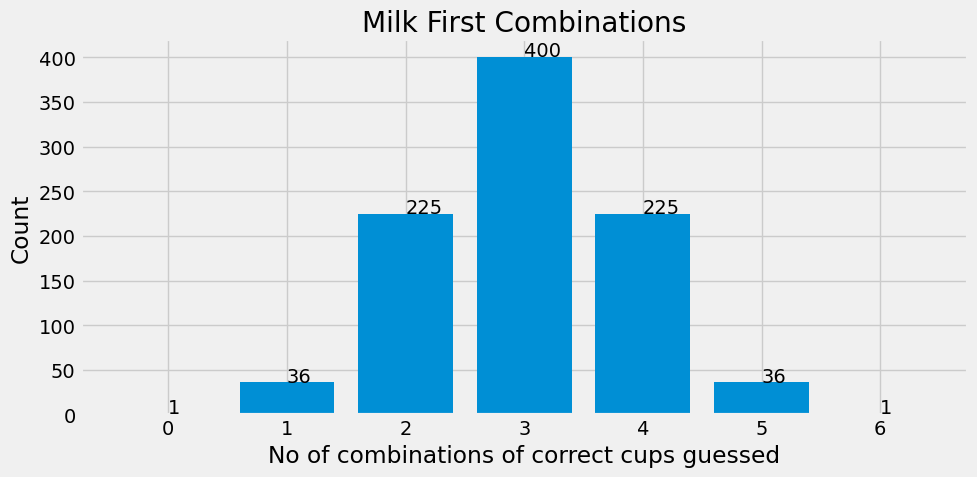

In [17]:
plt.bar(counts[0], counts[1])
plt.title('Milk First Combinations')
plt.ylabel('Count')
plt.xlabel('No of combinations of correct cups guessed')
for index, da in enumerate(x_counts):
    plt.text(x=index, y=da+1, s=f'{da}')
plt.tight_layout()
plt.show()

**Answer** - the probability, assuming they have no special powers, that the person makes at most one error is 0.04 (rounded).

#### Would you accept two errors? Explain.

Calculating the probability of two errors:

$\frac {225}{924} + \frac {36}{924} + \frac {1}{924} = 0.28$ (rounded)

In [18]:
# using python to calculate the probability of at most two errors

((math.comb(12,6)/924) + (math.comb(6,5) * math.comb(6,1)) 
 + (math.comb(6,4) * math.comb(6,2)))/924

0.28354978354978355

In most cases, the predetermined level of significance for rejecting the null hypothesis will be 0.05 (Bevans, 2019). That is, when there is a less than 5% chance that one would see these results if the null hypothesis were true.

The probability of the lady selecting the six correct cups is 1 in 924 (p=0.1%). This is extremely rare. The chance of it happening at random is low thus H<sub>0</sub> can be accepted. In theory the lady could select the six cups by random chance on her first attempt. This could be mitigated against by running the experiment multiple times.

The probability of the lady selecting the six cups but allowing for two errors is slightly higher 1 in 4 (p = 28%). This is greater than the 5% threshold for accepting H<sub>0</sub>. The chance of it occurring at random is high.

In this case, if one was to reject the H<sub>0</sub> and accept H<sub>a</sub> there is a risk of a false positive. One accepts that the lady has the ability to discern when milk was poured first into the cup when in reality she has no special ability.

**Answer** - I would not reject the null hypothesis, or accept two errors, as the the risk of as false positive is too great.

### References

Bevans, R. (2019). Hypothesis Testing | A Step-by-Step Guide with Easy Examples. [online] Scribbr. Available at: https://www.scribbr.com/statistics/hypothesis-testing/. [Accessed 20th Oct. 2024].

Investopedia. (n.d.). Null Hypothesis: What Is It and How Is It Used in Investing? [online] Available at: https://www.investopedia.com/terms/n/null_hypothesis.asp#toc-what-is-a-null-hypothesis. [Accessed 18th Oct. 2024].

Majaski, C. (2024). Hypothesis Testing: 4 Steps and Example. [online] Investopedia. Available at: https://www.investopedia.com/terms/h/hypothesistesting.asp#toc-how-hypothesis-testing-works [Accessed 20 Oct. 2024].

Mathsisfun.com. (2017). Combinations and Permutations. [online] Available at: https://www.mathsisfun.com/combinatorics/combinations-permutations.html. [Accessed 10th Oct. 2024].

Mc Donald, I. (2024) '02_lady_tasting_tea.ipynb', *8651 Applied Statistics*, Atlantic Technical University. October 2024.

Wikipedia Contributors (2019). Lady tasting tea. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Lady_tasting_tea. [Accessed 10th Oct. 2024].

Wikipedia Contributors (2019). Ronald Fisher. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Ronald_Fisher. [Accessed 10th Oct. 2024].

Winkler, A.M. (2015). The lady tasting tea experiment. [online] Brainder. Available at: https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/. [Accessed 10th Oct. 2024].

www.programiz.com. (n.d.). Python Program to Find the Factorial of a Number. [online] Available at: https://www.programiz.com/python-programming/examples/factorial. [Accessed 10th Oct. 2024].

www.w3schools.com. (n.d.). Python math.comb() Method. [online] Available at: https://www.w3schools.com/python/ref_math_comb.asp.  [Accessed 16th Oct. 2024].

---

## Task 2: Numpy's Normal Distribution

### Problem Statement Part One

1. Generate, `numpy.random.normal()` , a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

#### Solution

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The characteristic standard distribution bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within 2 standard deviations of the mean. 

![Normal Distribution Curve](images/task_2/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

<sub>By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713</sub>

The code in the solution below is based on code from
1. [https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal), accessed 21 Oct. 2024.

2. [https://realpython.com/numpy-random-normal/](https://realpython.com/numpy-random-normal/), accessed 21 Oct. 2024.


In [19]:
# define variables - no of values to be generated, mean, standard deviation
# and no of bins for histograms
n, mu, sigma, n_bins = 100000, 10.0, 3.0, 30

In [20]:
# define random generator 
# https://numpy.org/doc/stable/reference/random/index.html#quick-start
rng = np.random.default_rng(seed=49)

# randomly generate the requested values
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
values = rng.normal(mu, sigma, size=n)

The values generated by *Numpy* can be visualised using a histogram. This demonstrates the *bell curve* plot typical of a Gaussian distribution.

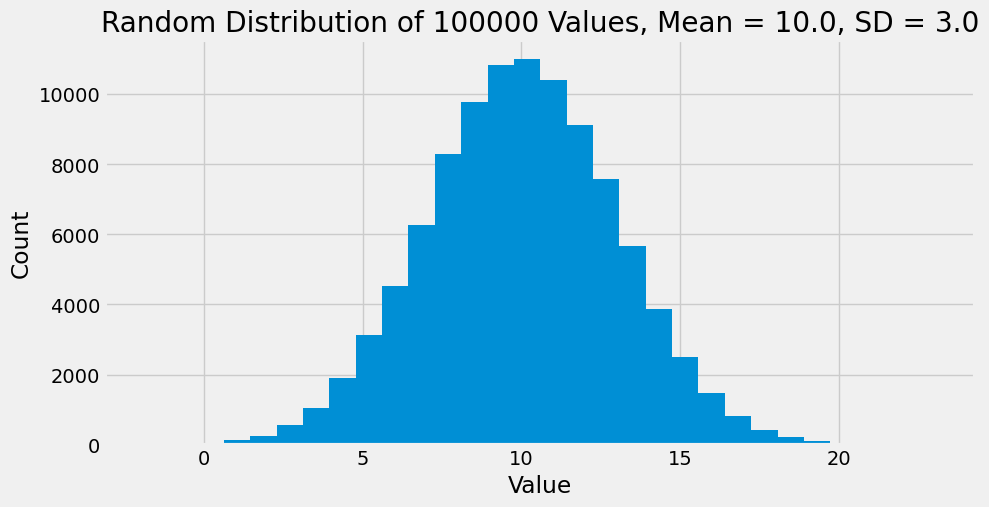

In [21]:
# create a display object
fig, ax = plt.subplots()

# plot histogram of the data
ax.hist(values, bins=n_bins)
ax.set_title(f'Random Distribution of {n} Values, Mean = {mu}, SD = {sigma}')
ax.set_xlabel('Value')
ax.set_ylabel('Count');

Visualising the first five elements in the array demonstrates that the values generated are continuous values as opposed to discrete values.

In [22]:
# show the first five values generated
values[0:5]

array([11.71196804, 14.14782443, 10.71656127,  5.4419013 , 10.36049027])

### Problem Statement Part Two

2. Use the `scipy.stats.shapiro()` function to test whether the sample generated comes from a normal distribution. Explain the results and output.

#### Solution

The Shapiro-Wilk test is a statistical test where the null hypothesis is that the data is normally distributed (Malato, 2023). This test has a flaw in so far as it doesn't work well with large datasets (ibid.).

This test outputs a test statistic and a p-value (probability). A W value close to one indicates that the data is likely to be normally distributed and a helps determine to reject or accept the null hypothesis (Humaizi, 2024). A common P-Value threshold is 0.05%. If the P-Value is great than this threshold the null hypothesis is accepted.

In Python Shapiro-Wilk test is implemented with ```scipy.stats.shapiro()``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro)method. This function takes an array as an input and returns the test statistic (W) and p-value.

The threshold for values is a choice that should be made before the data is analyzed with consideration of the risks of both false positives (incorrectly rejecting the null hypothesis) and false negatives (failure to reject a false null hypothesis), (ibid.).

In [23]:
# Run the Shapiro-Wilk test on the values
shapiro_results = stats.shapiro(values)

print(f"The test statistic (W) is {shapiro_results.statistic}.\n"
      f"The p-value is {shapiro_results.pvalue}.")

The test statistic (W) is 0.9999835223732305.
The p-value is 0.9728054525791827.


/home/sean/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In this instance a W value of 0.999 (rounded) indicates that the values in the generated array are likely to be normally distributed as the test statistic is close to one.

A p-value of 0.973 (rounded) is greater than 0.05 and the null hypothesis can be accepted. The high p-value could be inaccurate as per Malato (2023). In this instance it is known that the data is normally distributed as it has been drawn from a random normal distribution and visualisation of the data in a histogram plot confirms this.

### Problem Statement Part Three

3. Plot a histogram of the values and plot the corresponding normal distribution probability density function on top of it.

#### Solution

In mathematical terms the normal distribution probability density function is expressed as:

$f(x)={\frac {1}{\sigma\sqrt {2\pi ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$

<sub>(Martins, 2023)</sub>

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

In this instance $\mu = 10$ and $\sigma = 3$

A Python function is defined to return the probability density function based on the above mathematical function.

In [24]:
# based on code found at:
# https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html
def normal_dist(x , mean , sd):
    prob_density = 1/(sd*np.sqrt(2 * np.pi))*np.exp(-(x-mean)**2 /(2 * sd**2))
    return prob_density

In [25]:
# Assign the max & min values to a variable
max = values.max()
min = values.min()

The ```np.linspace()``` method is used to return evenly spaced numbers over a specified interval.

In [26]:
# https://numpy.org/devdocs/reference/generated/numpy.linspace.html#numpy-linspace 
x_axis = np.linspace(min, max, n)

The probability density function for the x_axis variable is returned.

In [27]:
pdf = normal_dist(x_axis, mu, sigma)

The probability density function is plotted over a histogram of the the randomly normally distributed values.

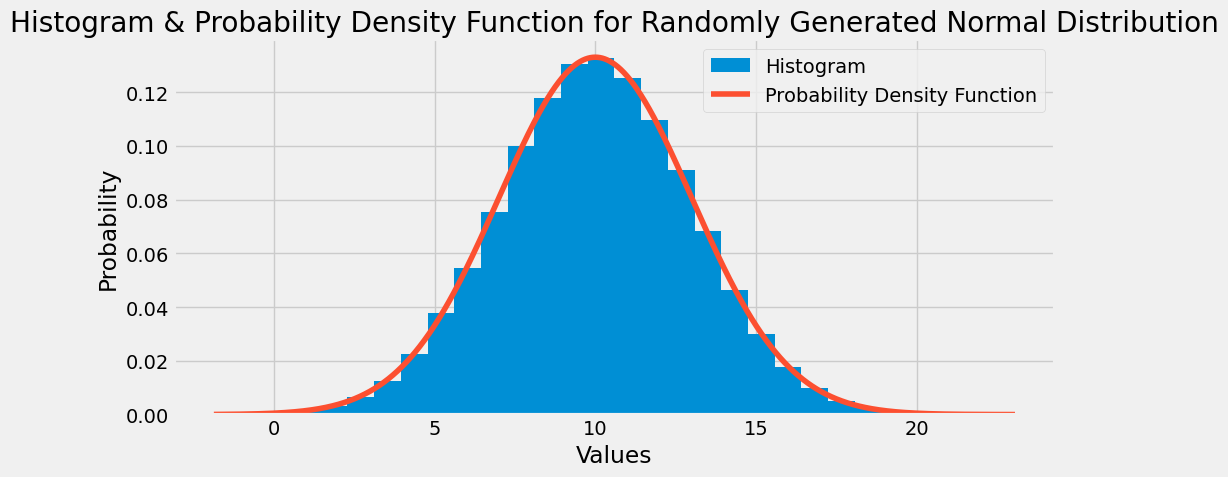

In [28]:
# adapted from code found here: 

# create an empty plot
fig, ax = plt.subplots()

# plot the histogram and PDF
ax.hist(values, bins=n_bins, density=True, label='Histogram')
ax.plot(x_axis, pdf, label='Probability Density Function')
ax.legend()
ax.set_title('Histogram & Probability Density Function for Randomly Generated Normal Distribution')

# show the plots
plt.xlabel('Values')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

An alternative method to plot the PDF over the distribution is to use the ```stat.norm.pdf()``` method (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy-stats-norm).

This method takes the set of values, the mean and the standard deviation as inputs. It returns the probility density function. This is then plotted over the histogram of the randomly generated values.

**Answer:**

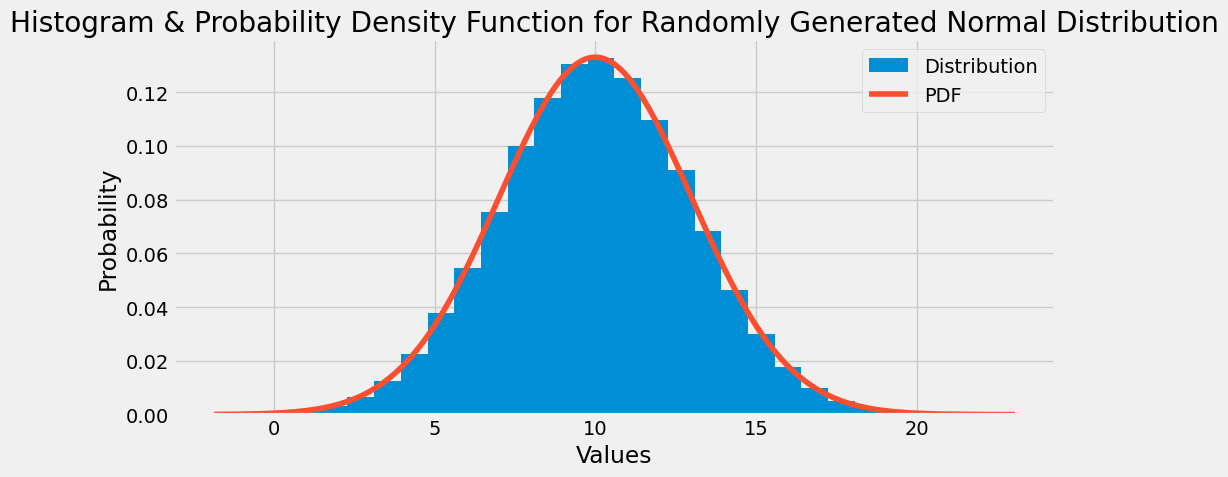

In [29]:
# create an empty plot
fig, ax = plt.subplots()

# Plot the pdf and historgram
ax.hist(values, density=True, bins=n_bins, label='Distribution')
ax.plot(x_axis, stats.norm.pdf(x_axis, mu, sigma), label='PDF')
ax.set_title('Histogram & Probability Density Function for Randomly Generated Normal Distribution')

# show the plots
plt.legend()
plt.xlabel('Values')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

### References

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 21 Oct. 2024].

Humaizi, A. (2024). 10.0 Shapiro-Wilk test - Ahmad Humaizi - Medium. [online] Medium. Available at: https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6. [Accessed 29 Oct. 2024].

Malato, G. (2023). An Introduction to the Shapiro-Wilk Test for Normality | Built In. [online] builtin.com. Available at: https://builtin.com/data-science/shapiro-wilk-test. [Accessed 29 Oct. 2024].

Martins, C. (2023). Gaussian Naive Bayes Explained With Scikit-Learn | Built In. [online] builtin.com. Available at: https://builtin.com/artificial-intelligence/gaussian-naive-bayes. [Accessed 27 Oct. 2024].

matplotlib.org. (n.d.). Matplotlib documentation — Matplotlib 3.5.0 documentation. [online] Available at: https://matplotlib.org/stable/. [Accessed 27 Oct. 2024].

Numpy (2009). NumPy. [online] Numpy.org. Available at: https://numpy.org/. [Accessed 21 Oct. 2024].

Python, R. (n.d.). How to Get Normally Distributed Random Numbers With NumPy – Real Python. [online] realpython.com. Available at: https://realpython.com/numpy-random-normal/. [Accessed 21 Oct. 2024]

SciPy (2020). SciPy.org — SciPy.org. [online] Scipy.org. Available at: https://scipy.org/. [Accessed 29 Oct. 2024].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 21 Oct. 2024].

---

## Task 3: t-Test Calculation

### Problem Statement

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

1. Calculate the t-statistic based on this data set, using Python.

2. Compare it to the value given by `scipy.stats`.

3. Explain your work and list any sources used.

### References

---

## Task 4: ANOVA

### Problem Statement

In this test the probability of committing a type II error in specific circumstances is estimated.

1. To begin, create a variable called `no_type_ii` and set it to `0`.

2. Use a loop to perform the following test 10,000 times.

3. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

4. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

5. Summarize and explain your results.

### References

---

Notebook ends.